## Time Series Prediction (Moving Window Approach)
---

#### Import some python libraries

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("poster")

####helper functions 

In [335]:
def rolling_univariate_window(time_series, window_size):    
    shape = (time_series.shape[0] - window_size + 1, window_size)  
    strides = time_series.strides + (time_series.strides[-1],)
    return np.lib.stride_tricks.as_strided(time_series, shape=shape, strides=strides)


def build_rolling_window_dataset(time_series, window_size):
    last_element = time_series[-1]
    time_series = time_series[:-1]
    X_train = rolling_univariate_window(time_series, window_size)
    y_train = np.array([X_train[i, window_size-1] for i in range(1, X_train.shape[0])])
    
    return X_train, np.hstack((y_train, last_element))

def train_test_split(no_of_training_instances, X_all, y_all):
    X_train = X_all[0:no_of_training_instances, :]
    X_test = X_all[no_of_training_instances:, :]
    y_train = y_all[0:no_of_training_instances]
    y_test = y_all[no_of_training_instances:]
    
    return X_train, X_test, y_train, y_test

def print_graph(X_all, X_test, y_all, y_test, y_pred):
    training_size = X_all.shape[0] - X_test.shape[0]
    x_full_limit = np.linspace(1, X_all.shape[0], X_all.shape[0])
    y_pred_limit = np.linspace(training_size+1, training_size + 1 + X_test.shape[0], X_test.shape[0])
    plt.plot(x_full_limit, y_all, label='actual', color='b', linewidth=1)
    plt.plot(y_pred_limit, y_pred, '--', color='r', linewidth=2, label='prediction')
    plt.legend(loc=0)
    plt.show()

#### Loading some time series datasets

In [322]:
# http://robjhyndman.com/tsdldata/data/nybirths.dat
nybirths = pd.read_csv('./nybirths.csv')
nybirths = nybirths.values.flatten()

# http://robjhyndman.com/tsdldata/data/fancy.dat
souvenirtimeseries = pd.read_csv('./fancy.csv')
souvenirtimeseries = souvenirtimeseries.values.flatten()

# https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line
milk_production_data = pd.read_csv('./milk_production.csv')
milk_production = milk_production_data['Production'].values.flatten()

#### Milk production dataset
---

mean_absolute_error: 6.841895


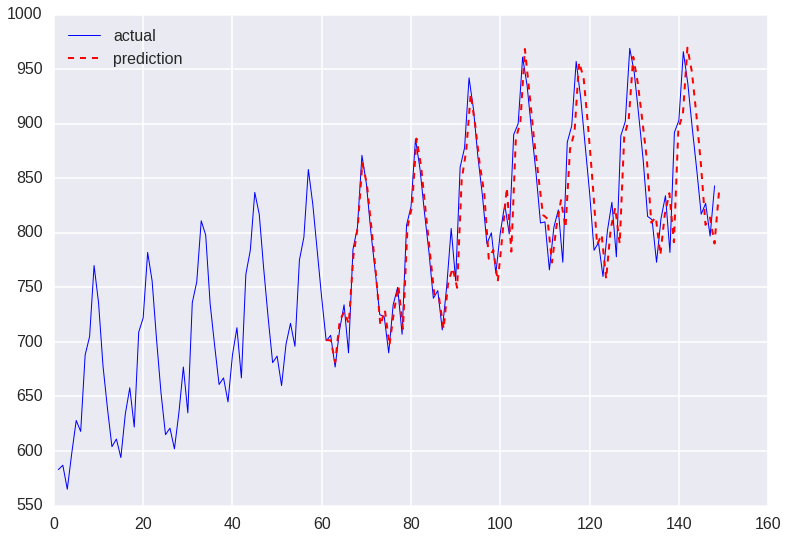

In [336]:
window_size = 20
training_set_size = 60

X_all, y_all = build_rolling_window_dataset(milk_production, window_size)
X_train, X_test, y_train, y_test = train_test_split(training_set_size, X_all, y_all)

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)    
print "mean_absolute_error: %f" %(mean_absolute_error(y_test, y_pred))
print_graph(X_all, X_test, y_all, y_test, y_pred)

#### births dataset
----

mean_absolute_error: 0.671430


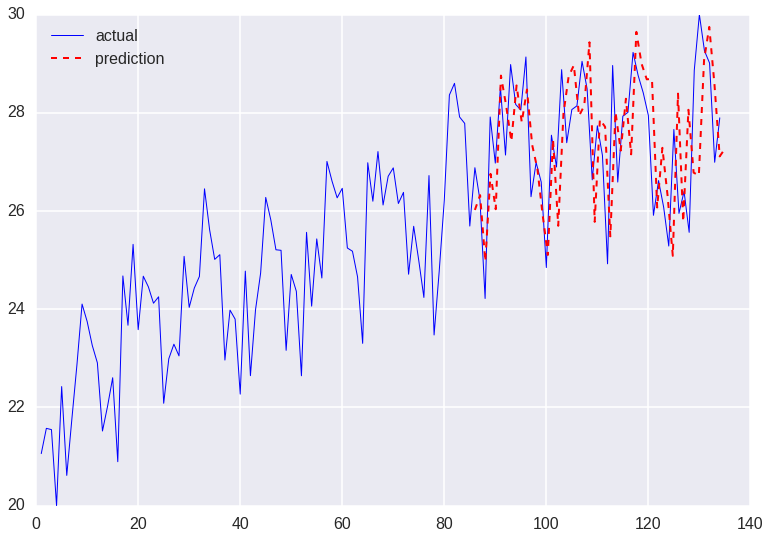

In [377]:
window_size = 33
training_set_size = 85

X_all, y_all = build_rolling_window_dataset(nybirths, window_size)
X_train, X_test, y_train, y_test = train_test_split(training_set_size, X_all, y_all)

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)    
print "mean_absolute_error: %f" %(mean_absolute_error(y_test, y_pred))
print_graph(X_all, X_test, y_all, y_test, y_pred)

#### souvenir dataset
----

mean_absolute_error: 5121.030371


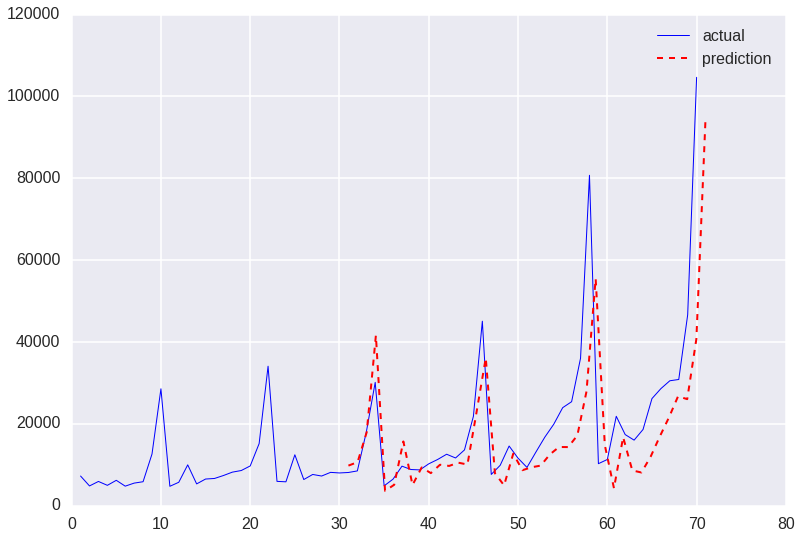

In [343]:
window_size = 13
training_set_size = 30

X_all, y_all = build_rolling_window_dataset(souvenirtimeseries, window_size)
X_train, X_test, y_train, y_test = train_test_split(training_set_size, X_all, y_all)

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)    
print "mean_absolute_error: %f" %(mean_absolute_error(y_test, y_pred))
print_graph(X_all, X_test, y_all, y_test, y_pred)